In [15]:
import meteostat
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime


In [16]:
sudbury = Point(46.49, -80.99)

# for last 5 years
start = datetime(2019, 1, 1)
end = datetime(2023, 12, 31)


In [3]:
# Fetching daily weather data for Sudbury
weather_data = Daily(sudbury, start, end)
weather_data = weather_data.fetch()

# Converting to DataFrame for easy manipulation
df = pd.DataFrame(weather_data)

# Parsing the 'time' column explicitly to datetime
df['time'] = pd.to_datetime(df.index)

# Printing the first few rows of data to verify
print(df.head())


            tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                         
2019-01-01 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9   NaN   
2019-01-02 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2   NaN   
2019-01-03  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6   NaN   
2019-01-04  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7   NaN   
2019-01-05  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1   NaN   

                 time  
time                   
2019-01-01 2019-01-01  
2019-01-02 2019-01-02  
2019-01-03 2019-01-03  
2019-01-04 2019-01-04  
2019-01-05 2019-01-05  


In [20]:
import meteostat
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime

sudbury = Point(46.49, -80.99)

# Define the time period for last 5 years
start = datetime(2019, 1, 1)
end = datetime(2023, 12, 31)

weather_data = Daily(sudbury, start, end)
weather_data = weather_data.fetch()

df = pd.DataFrame(weather_data)
df['time'] = pd.to_datetime(df.index)

print(df.head())

df.to_csv('sudbury_weather_data.csv', index=False)


            tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                         
2019-01-01 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9   NaN   
2019-01-02 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2   NaN   
2019-01-03  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6   NaN   
2019-01-04  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7   NaN   
2019-01-05  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1   NaN   

                 time  
time                   
2019-01-01 2019-01-01  
2019-01-02 2019-01-02  
2019-01-03 2019-01-03  
2019-01-04 2019-01-04  
2019-01-05 2019-01-05  


In [18]:
import os
print(os.getcwd())


C:\Users\Aanchal\Desktop\Laurentian\data mining\Weather_Data_Prediction_Project


In [23]:
# import pandas as pd

# # Load the CSV file
# df = pd.read_csv('sudbury_weather_data.csv')

# # Display the first few rows to get a sense of the data
# print(df.head())
# # Drop the 'tsun' column
# df = df.drop(columns=['tsun'])
# # Convert 'time' column to datetime format
# df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
# print(df.head())
# # Check for missing values
# print(df.isnull().sum())
# # Fill missing values with column means
# df = df.fillna(df.mean())
# # Drop duplicate rows
# df = df.drop_duplicates()
# # Save the cleaned data to a new CSV file
# df.to_csv('sudbury_weather_data_cleaned.csv', index=False)



import pandas as pd

# Load the CSV file
df = pd.read_csv('sudbury_weather_data.csv')

# Display the first few rows to get a sense of the data
print(df.head())

# Drop the 'tsun' column if it exists
if 'tsun' in df.columns:
    df = df.drop(columns=['tsun'])

# Convert 'time' column to datetime format
try:
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')  # Adjusted format
except ValueError:
    # If the above fails, try inferring the format
    df['time'] = pd.to_datetime(df['time'], format='mixed')

print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values with column means
df = df.fillna(df.mean(numeric_only=True))  # Use only numeric columns

# Drop duplicate rows
df = df.drop_duplicates()

# Save the cleaned data to a new CSV file
df.to_csv('sudbury_weather_data_cleaned.csv', index=False)


   tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  tsun        time
0 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9   NaN  2019-01-01
1 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2   NaN  2019-01-02
2  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6   NaN  2019-01-03
3  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7   NaN  2019-01-04
4  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1   NaN  2019-01-05
   tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres       time
0 -15.4 -22.3  -8.5   6.4  370.0  345.0  18.9  54.0  1020.9 2019-01-01
1 -19.3 -27.4 -11.2   0.4  370.0  152.0  11.1   NaN  1023.2 2019-01-02
2  -6.1 -11.3  -0.8   4.0  390.0  214.0  13.8  46.0  1008.6 2019-01-03
3  -0.5  -1.7   0.8   0.0  400.0  234.0  14.5  41.0  1003.7 2019-01-04
4  -3.3  -5.8  -0.8   0.4  370.0    NaN   7.8   NaN  1006.1 2019-01-05
tavg       0
tmin       0
tmax       0
prcp       0
snow    1221
wdir      18
wspd       1
wpgt     633
pr

In [8]:
# Generate descriptive statistics for each column
print(df.describe())


              tavg         tmin         tmax         prcp         snow  \
count  1826.000000  1826.000000  1826.000000  1826.000000   605.000000   
mean      4.695181    -0.367579     9.740471     2.439266   265.785124   
std      11.966545    11.790213    12.522126     5.231854   228.816246   
min     -30.200000   -37.100000   -23.900000     0.000000     0.000000   
25%      -4.175000    -8.200000    -0.300000     0.000000    80.000000   
50%       5.100000     0.300000     9.750000     0.000000   250.000000   
75%      15.400000     9.600000    21.100000     2.200000   380.000000   
max      25.800000    20.600000    33.500000    40.500000  1020.000000   

              wdir         wspd         wpgt         pres  
count  1808.000000  1825.000000  1193.000000  1821.000000  
mean    187.148230    15.473315    45.036044  1015.835585  
std     105.749901     5.271010    11.763806     8.090183  
min       0.000000     4.100000    31.000000   982.800000  
25%      95.750000    11.500000  

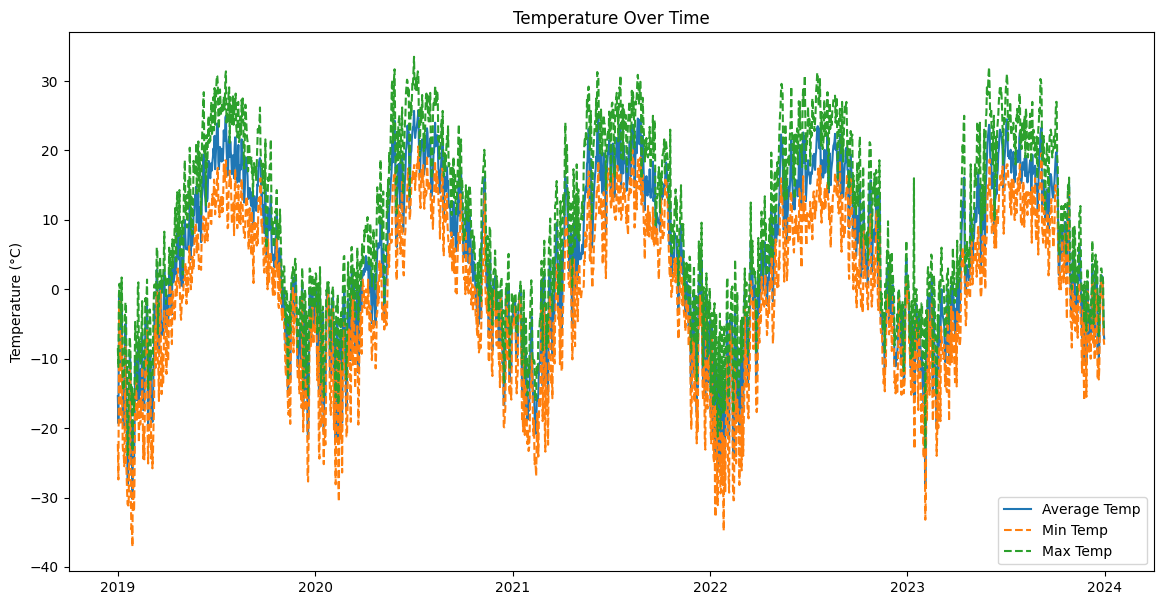

In [24]:
import matplotlib.pyplot as plt

# Plot average, min, and max temperatures over time
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['tavg'], label='Average Temp')
plt.plot(df['time'], df['tmin'], label='Min Temp', linestyle='--')
plt.plot(df['time'], df['tmax'], label='Max Temp', linestyle='--')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()


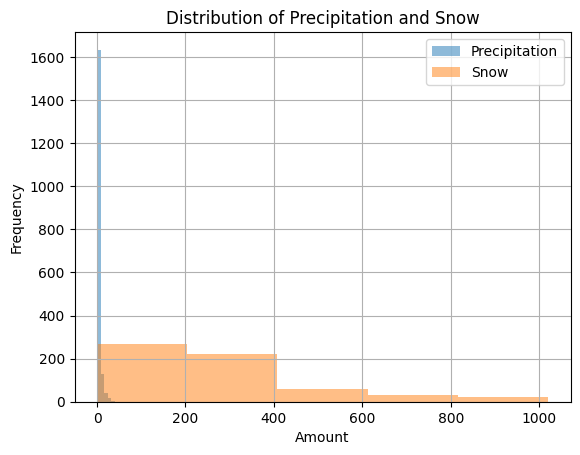

In [11]:
# Histogram for precipitation and snow


df['prcp'].hist(bins=5, alpha=0.5, label='Precipitation')
df['snow'].hist(bins=5, alpha=0.5, label='Snow')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation and Snow')
plt.legend()
plt.show()


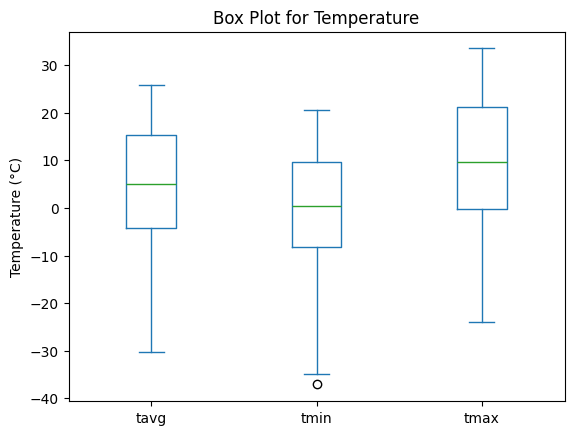

In [25]:
# Box plot for temperature columns
df[['tavg', 'tmin', 'tmax']].plot(kind='box')
plt.title('Box Plot for Temperature')
plt.ylabel('Temperature (°C)')
plt.show()


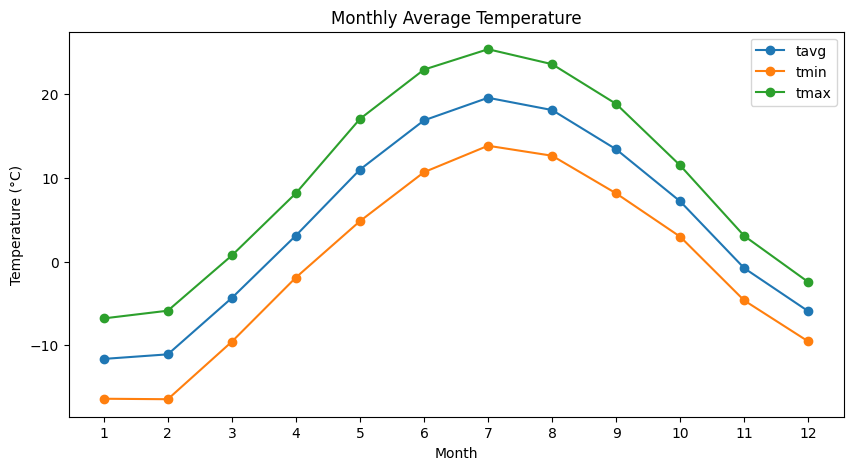

In [26]:
# Extract month from the date
df['month'] = df['time'].dt.month

# Calculate monthly averages
monthly_avg = df.groupby('month')[['tavg', 'tmin', 'tmax', 'prcp']].mean()

# Plot monthly averages for temperature
monthly_avg[['tavg', 'tmin', 'tmax']].plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.show()


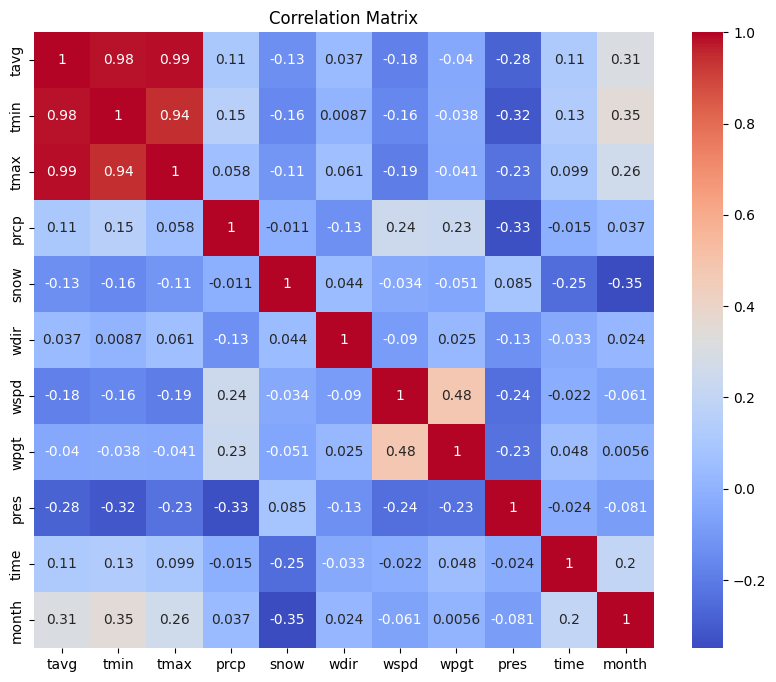

In [28]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [30]:
# Features (independent variables)
features = ['tmin', 'tmax', 'prcp', 'snow']

# Target (dependent variable)
target = 'tavg'
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.38
R^2 Score: 1.00


In [33]:
# Example new data
new_data = pd.DataFrame({
    'tmin': [5],  # Example values
    'tmax': [15],
    'prcp': [0.2],
    'snow': [0]
})

# Predict
predicted_tavg = model.predict(new_data)
print(f"Predicted Average Temperature: {predicted_tavg[0]:.2f}°C")


Predicted Average Temperature: 10.03°C


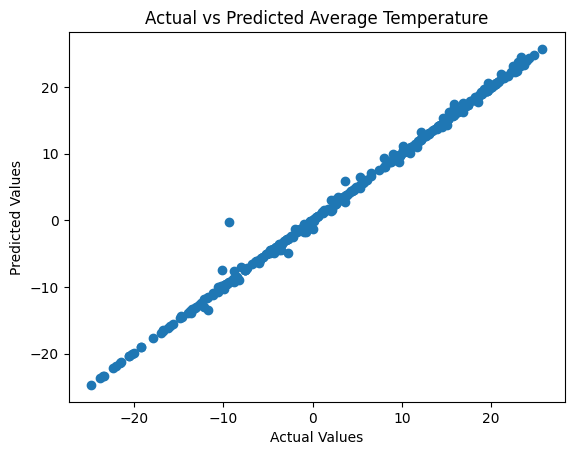

In [34]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Average Temperature")
plt.show()


In [35]:
import joblib

joblib.dump(model, 'weather_prediction_model.pkl')


['weather_prediction_model.pkl']

Mean Squared Error (MSE): 0.38
Mean Absolute Error (MAE): 0.22
Root Mean Squared Error (RMSE): 0.62
R-squared (R^2): 1.00
Cross-Validated RMSE Scores: [0.18375028322082604, 0.24157105636136159, 0.17118682840234017, 0.3228409630814302, 0.8588481963612166]
Average Cross-Validated RMSE: 0.36


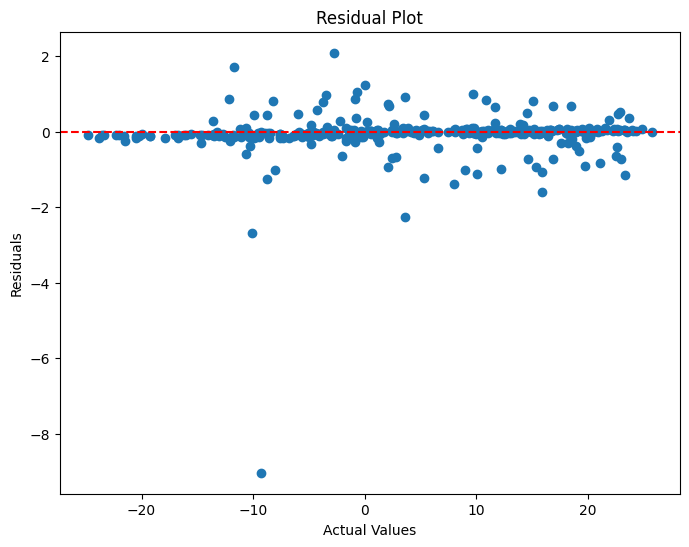

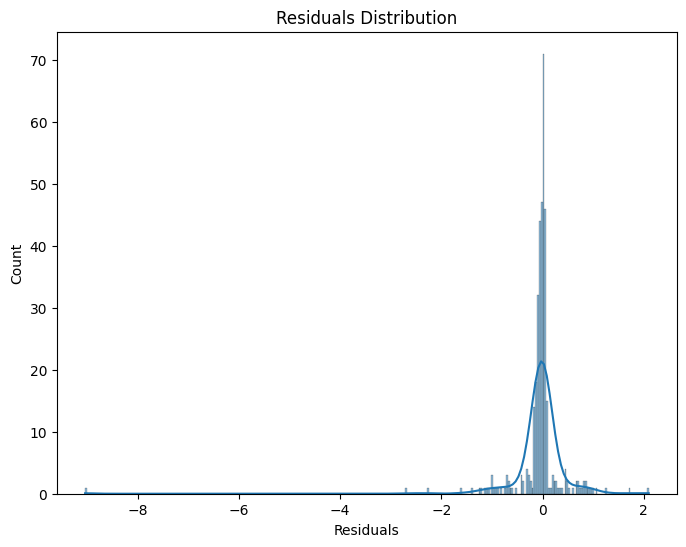

Feature Coefficients:
tmin: 0.49
tmax: 0.51
prcp: 0.00
snow: -0.00
month: 0.00


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the dataset
df = pd.read_csv('sudbury_weather_data_cleaned.csv')

# Select features and target
df['month'] = pd.to_datetime(df['time']).dt.month  # Add month as a feature
features = ['tmin', 'tmax', 'prcp', 'snow', 'month']
target = 'tavg'
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = [np.sqrt(-score) for score in cv_scores]
print(f"Cross-Validated RMSE Scores: {cv_rmse_scores}")
print(f"Average Cross-Validated RMSE: {np.mean(cv_rmse_scores):.2f}")

# Residual analysis
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

# Feature importance (coefficients)
print("Feature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
